## DTW alignment paths

This script must be run from the parent of the *temporary* directory containing the brute force pairwise DTW distances, which must be the same directory as the parent of the *data* directory.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn import metrics

np.random.seed(12345)

%run sys_configs.ipynb

In [2]:
with open('data/train.npy', 'rb') as f:
    x_train = np.load(f)
    y_train = np.load(f).astype(np.int64)
sz, dim = x_train.shape[1:]
    
with open('data/val.npy', 'rb') as f:
    x_val = np.load(f)
    y_val = np.load(f).astype(np.int64)
    
with open('data/test.npy', 'rb') as f:
    x_test = np.load(f)
    y_test = np.load(f).astype(np.int64)

In [3]:
train_sample = x_train[np.random.randint(0, len(x_train)), :, 0]
test_sample = x_test[np.random.randint(0, len(x_test)), :, 0]

Construct the DTW path between the train and test sample.

In [4]:
dtw_path, sim_dtw = metrics.dtw_path(train_sample, test_sample)

Then plot the alignment path.

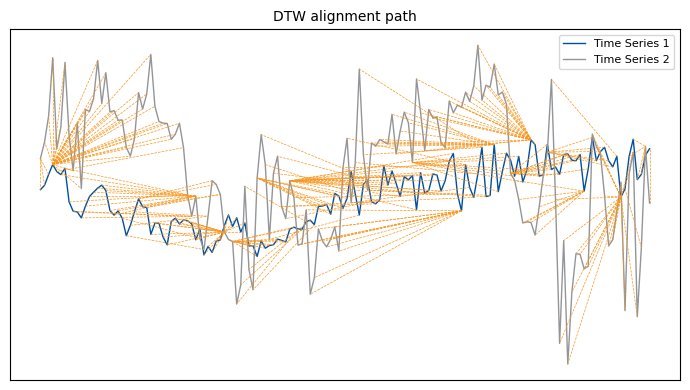

In [5]:
plt.figure(1, figsize=(7, 4))
plt.plot(train_sample, color=scale_rgb(COLOURS.get("primary-color")), label="Time Series 1", linewidth=1)
plt.plot(test_sample, color=scale_rgb(COLOURS.get("accent-grey-dark-3")), label="Time Series 2", linewidth=1)

for positions in dtw_path:
    plt.plot([positions[0], positions[1]],
             [train_sample[positions[0]], test_sample[positions[1]]],
             color=scale_rgb(COLOURS.get("accent-orange")), linestyle="--", linewidth=0.5)

plt.legend(loc="upper right", fontsize=8)
plt.title("DTW alignment path", fontsize=10)

plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('DTWAlignmentPaths.pdf', dpi = 1000, format = 'pdf', bbox_inches = 'tight')
plt.show()